# Imports
The libraries chosen here are not the only options, but they are a simple way to get started with the data.

In [1]:
from pprint import pprint, pformat
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

# Working with the air-LUSI data
First import the data into an xarray dataset

In [2]:
ds = xr.load_dataset("../data/air_lusi_spectra.nc")

Below we describe the variables required to use the dataset. Some variables that have been provided for convenience can be understood from looking at the dataset attributes. The dataset is shown here:

In [3]:
ds

<xarray.Dataset> Size: 355kB
Dimensions:                                 (Flight_Number: 4, Wavelength: 834)
Coordinates:
    Time                                    (Flight_Number) datetime64[ns] 32B ...
  * Wavelength                              (Wavelength) float64 7kB 381.5 .....
  * Flight_Number                           (Flight_Number) int64 32B 1 3 4 5
Data variables: (12/31)
    Irradiance                              (Flight_Number, Wavelength) float64 27kB ...
    GPS_alt_km                              (Flight_Number) float64 32B 21.1 ...
    Press_alt_km                            (Flight_Number) float64 32B 21.03...
    Lat                                     (Flight_Number) float64 32B 35.01...
    Lon                                     (Flight_Number) float64 32B -117....
    Irradiance_stat_err                     (Flight_Number, Wavelength) float64 27kB ...
    ...                                      ...
    d_sun_moon                              (Flight_Number) float64 32B 1.489...
    distance_correction_factor              (Flight_Number) float64 32B 1.047...
    observer_pos_x                          (Flight_Number) float64 32B -4.30...
    observer_pos_y                          (Flight_Number) float64 32B 2.989...
    observer_pos_z                          (Flight_Number) float64 32B 3.66e...
    lunar_zenith_angle                      (Flight_Number) float64 32B 27.53...
Attributes:
    description:    Calibration data and uncertainties for transfer sphere fo...
    authors:        John Woodward, Stephen Maxwell
    campaign:       Air-LUSI Operational Campaign 1 (March 2022)
    email:          john.woodward@nist.gov,stephen.maxwell@nist.gov,kturpie@u...
    usage:          
    DOI:            https://doi.org/10.18434/mds2-3397
    creation time:  2024-12-19T21:26:34.477020+00:00
    license:        This data/work was created by employees of the National I...
    dependencies:   These data depend on the NIST air-lusi pipeline in use at...

One can see that there are 28 data variables, and 3 coordinate variables. For each data variable, attributes are stored in the property `.attrs`. In some editors, one can click on the "file icon" next to each variable to display attributes. Some of these attributes have been coded by hand, while others are produced automatically by the software used to create them. The NetCDF conventions are used as inspiration, but are not followed strictly.
The data variables share are:

In [4]:
[key for key, value in ds.variables.items()]

['Irradiance',
 'GPS_alt_km',
 'Press_alt_km',
 'Lat',
 'Lon',
 'Irradiance_stat_err',
 'slc_rel_err',
 'Wavelength_thermal_uncertainty_rel_err',
 'Calibration_Coefficients_total_rel_err',
 'Wavelength_uncertainty_rel_err',
 'Linearity_rel_err',
 'Camera_alignment_err',
 'Sensitivity_drift_err',
 'Time',
 'Wavelength',
 'Flight_Number',
 'Combined_atmospheric_rel_err',
 'Total_rel_err',
 'Time_String',
 'Lunar_Disk_Reflectance',
 'Lunar_Reflectance',
 'ephemeris_time',
 'signed_phase',
 'subobserver_lon',
 'subobserver_lat',
 'subsolar_lon',
 'subsolar_lat',
 'd_observer_moon',
 'd_sun_moon',
 'distance_correction_factor',
 'observer_pos_x',
 'observer_pos_y',
 'observer_pos_z',
 'lunar_zenith_angle']

while the coordinate variables are

In [5]:
[key for key, value in ds.coords.items()]

['Time', 'Wavelength', 'Flight_Number']

`Time` represents the mean time of the air-LUSI data acquisition during one flight. All data have been standardized to this mean time for each flight. Time is also provided as a string in `Time_String` and in `ephemeris_time` for use with the NAIF Spice toolkit. 

The position air-LUSI at the time of measurement is provided by `Lat`, `Lon`, and `GPS_alt_km` in the WGS84 frame from the ER-2 navigation system. An additional altitude, `Press_alt_km` is provided by this system and is used as an estimate of the amount of atmosphere above the instrument for atmospheric absorption corrections. 
The position is also provided in `observer_pos_x`,`observer_pos_y`,`observer_pos_z` in km in the J2000 coordinate system. 

The primary results from air-LUSI are stored in the variable `Irradiance`, which represents the irradiances observed by air-LUSI, corrected to the top of the atmosphere and standardized to a moon-observer distance of 384400 km and a sun-moon distance of 1 astronomical unit (1.495978707 $\times 10^8$ km). A factor `distance_correction_factor` is provided to undo the standardization, and each flight can be divided by the corresponding factor to accomplish this. This distance correction factor is the same as $f_d$ in Eq. (7) of Kieffer and Stone, "The Spectral Irradiance of the Moon", <em>Astronom. J.</em> 129, 2887-2901 (2005) The instrument does measure outside of the range reported here, but the data have been truncated to only include ranges where the calibration is valid. Later data releases may have a wider spectral range. 

# Example plots of irradiance

Below we show how to plot the irradiances several different ways. Note that there is no flight 2 in this dataset, as the planned flight by that designation was cancelled due to weather.  

## Pyplot interface

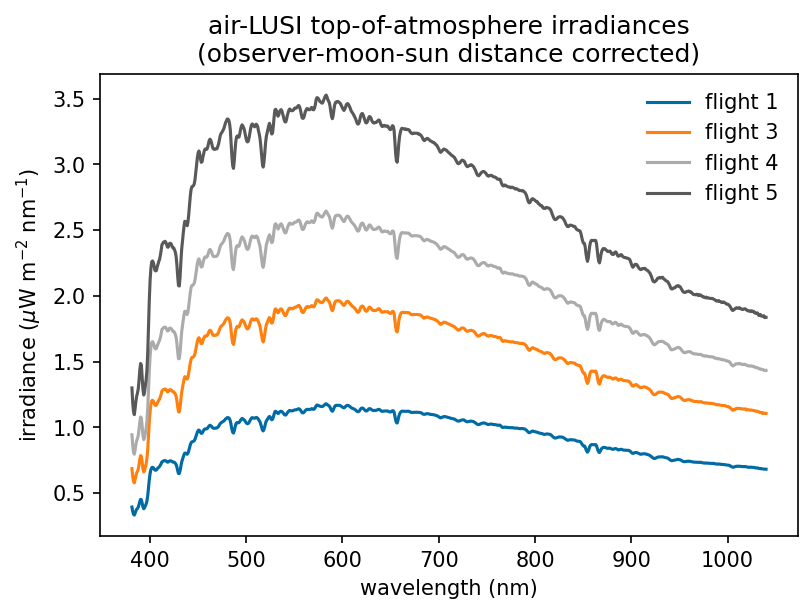

In [6]:
fig, ax = plt.subplots(1)  # create a figure axis
wavelength = ds["Wavelength"]  # define a wavelength variable for convenience
for flight_number in ds[
    "Flight_Number"
].values:  # loop over the flight number designations
    irr = ds.sel(Flight_Number=flight_number)[
        "Irradiance"
    ]  # select the irradiance for a flight
    ax.plot(
        wavelength, irr, label=f"flight {flight_number}"
    )  # plot the irradiance and add a label for the legend.
ax.set_xlabel("wavelength (nm)")

units = ds["Irradiance"].attrs[
    "units"
]  # get the units for the irradiance from the dataset.
ax.set_ylabel(
    f"irradiance ({units})"
)  # add a label using python f-string functionality.
ax.set_title(
    "air-LUSI top-of-atmosphere irradiances\n(observer-moon-sun distance corrected)"
)
ax.legend()
fig.set_size_inches(6, 4)  # change the figure size

## XArray interface
For a quick plot, one can use the xarray built-in plotting.

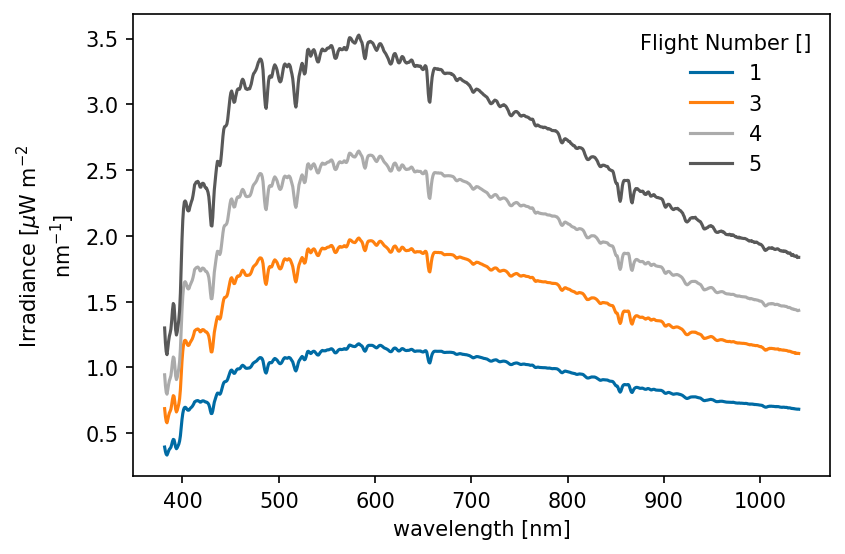

In [7]:
ds["Irradiance"].plot.line(x="Wavelength")
plt.gcf().set_size_inches(6, 4)  # resize the figure or it's big!

# Remove distance standardizations 


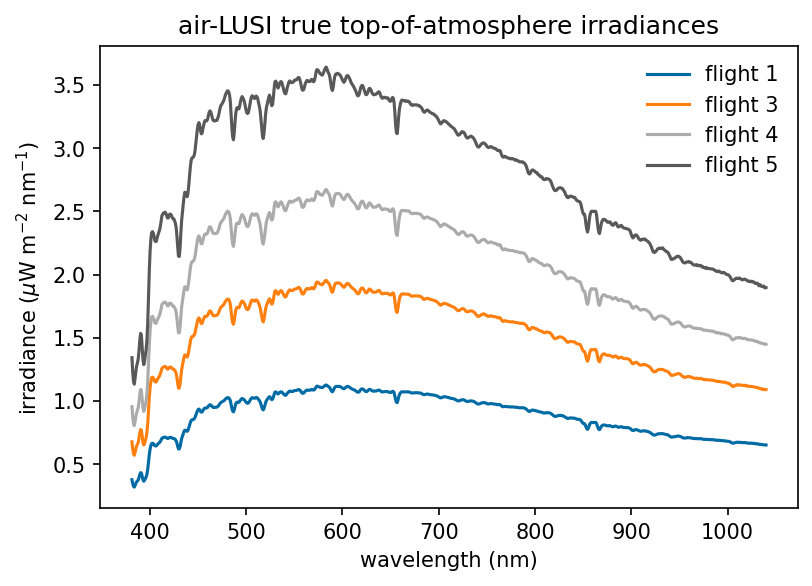

In [8]:
fig, ax = plt.subplots(1)  # create a figure axis
wavelength = ds["Wavelength"]  # define a wavelength variable for convenience
for flight_number in ds[
    "Flight_Number"
].values:  # loop over the flight number designations
    irr = (ds["Irradiance"] / ds["distance_correction_factor"]).sel(
        Flight_Number=flight_number
    )  # select the irradiance for a flight, and removing the distance standardization. Note we are letting xarray do the broadcasting of dimensions properly
    ax.plot(
        wavelength, irr, label=f"flight {flight_number}"
    )  # plot the irradiance and add a label for the legend.
ax.set_xlabel("wavelength (nm)")

units = ds["Irradiance"].attrs[
    "units"
]  # get the units for the irradiance from the dataset.
ax.set_ylabel(
    f"irradiance ({units})"
)  # add a label using python f-string functionality.
ax.set_title("air-LUSI true top-of-atmosphere irradiances")
ax.legend()
fig.set_size_inches(6, 4)  # change the figure size

# Using Xarray and removing distance standardizations 

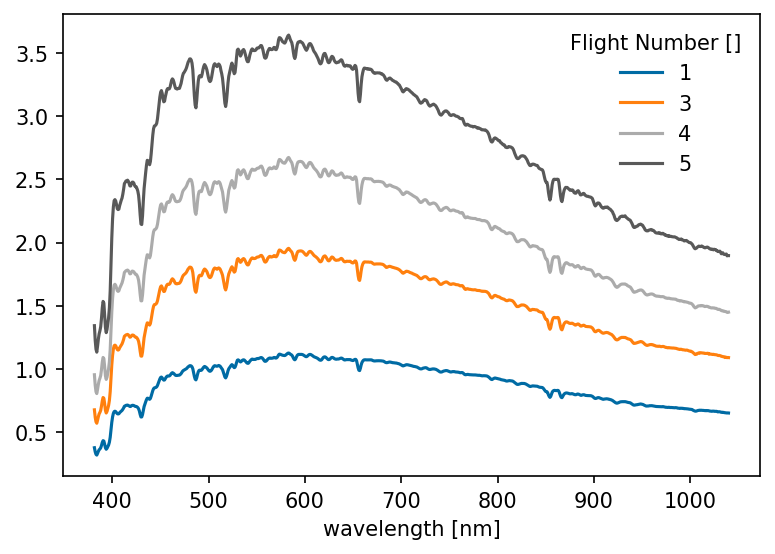

In [9]:
(ds["Irradiance"] / ds["distance_correction_factor"]).plot.line(x="Wavelength")
plt.gcf().set_size_inches(6, 4)  # resize the figure or it's big!

Note that the automatic axis labeling is lost here, but can be added back in with standard pyplot methods. 

# Reflectances
The dataset stores estimated lunar reflectances in two different ways. The first of these is as the "lunar disk reflectance," which is the standard way of representing the data in the lunar calibration community. The second is a raw physical reflectance, and the two are related by a constant factor that is the mean solid angle of the Moon, $\Omega_{\rm moon}$ as viewed from the Earth, divided by $\pi$ steradians. Numerically, $\Omega_{\rm moon}/\pi = 2.042833\times 10^{-5}$

In models of lunar reflectance, the distance-corrected reflectances are functions of the four libration angles $\theta,\phi,\Theta,\Phi$ which represent subobserver selenographic latitude and longitude and subsolar selenographic latitude and longitude. These are stored in the variables `subobserver_lon`, `subobserver_lat`, `subsolar_lon`, and `subsolar_lat`. The lunar disk reflectance is defined by
$$E_{\rm observer}(\lambda,\theta,\phi,\Theta,\Phi) = \frac{\Omega_{\rm moon}}{\pi}R_{\rm moon,disk}(\lambda,\theta,\phi,\Theta,\Phi) E_{\rm sun}(\lambda,\theta,\phi,\Theta,\Phi),$$


where distance corrections have been made to the irradiances viewed by the observer, $E_{\rm observer}(\lambda,\theta,\phi,\Theta,\Phi)$, and $E_{\rm sun}(\lambda,\theta,\phi,\Theta,\Phi)$ is the solar irradiance at 1 astronomical unit. 

The physical reflectance, also using distance corrected irradiances, is defined by 
$$E_{\rm observer}(\lambda,\theta,\phi,\Theta,\Phi) = R_{\rm moon}(\lambda,\theta,\phi,\Theta,\Phi) E_{\rm sun}(\lambda,\theta,\phi,\Theta,\Phi).$$

Note that while the data set provides uncertainties for our primary data product, the top-of-atmosphere irradiance at the time of observation, reflectances are provided for convenience and do not have an estimated uncertainty.


# Plots of reflectances 

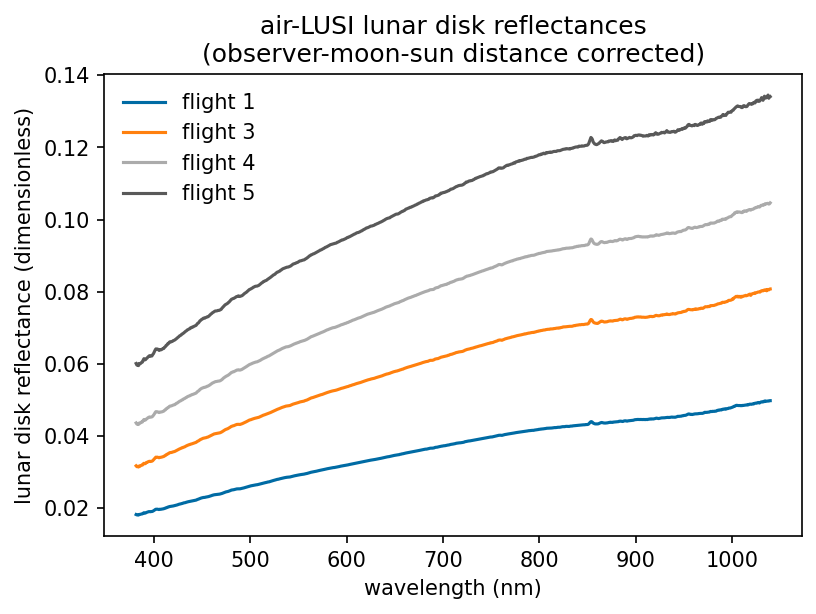

In [10]:
fig, ax = plt.subplots(1)  # create a figure axis
wavelength = ds["Wavelength"]  # define a wavelength variable for convenience
for flight_number in ds[
    "Flight_Number"
].values:  # loop over the flight number designations
    ref = ds.sel(Flight_Number=flight_number)[
        "Lunar_Disk_Reflectance"
    ]  # select the reflectance for a flight
    ax.plot(
        wavelength, ref, label=f"flight {flight_number}"
    )  # plot the irradiance and add a label for the legend.
ax.set_xlabel("wavelength (nm)")

units = ds["Lunar_Disk_Reflectance"].attrs[
    "units"
]  # get the units for the reflectance from the dataset.
ax.set_ylabel(
    f"lunar disk reflectance (dimensionless)"
)  # add a label using python f-string functionality.
ax.set_title("air-LUSI lunar disk reflectances\n(observer-moon-sun distance corrected)")
ax.legend()
fig.set_size_inches(6, 4)  # change the figure size

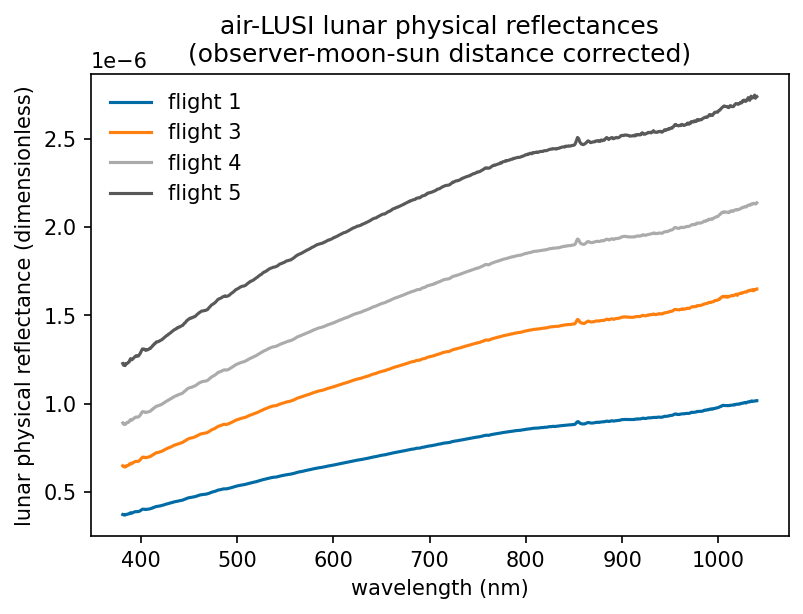

In [11]:
fig, ax = plt.subplots(1)  # create a figure axis
wavelength = ds["Wavelength"]  # define a wavelength variable for convenience
for flight_number in ds[
    "Flight_Number"
].values:  # loop over the flight number designations
    ref = ds.sel(Flight_Number=flight_number)[
        "Lunar_Reflectance"
    ]  # select the reflectance for a flight
    ax.plot(
        wavelength, ref, label=f"flight {flight_number}"
    )  # plot the irradiance and add a label for the legend.
ax.set_xlabel("wavelength (nm)")

units = ds["Lunar_Reflectance"].attrs[
    "units"
]  # get the units for the irradiance from the dataset.
ax.set_ylabel(
    f"lunar physical reflectance (dimensionless)"
)  # add a label using python f-string functionality.
ax.set_title(
    "air-LUSI lunar physical reflectances\n(observer-moon-sun distance corrected)"
)
ax.legend()
fig.set_size_inches(6, 4)  # change the figure size

# Solar spectrum
The solar spectrum used for the air-LUSI dataset is the "TSIS-1 Hybrid Solar Reference Spectrum Version 2" [https://doi.org/10.1029/2022EA002637](https://doi.org/10.1029/2022EA002637) at 0.1 nm spectral resolution; 0.025 nm sampling resolution ([downloadable here](https://lasp.colorado.edu/lisird/resources/lasp/hsrs/v2/hybrid_reference_spectrum_p1nm_resolution_c2022-11-30_with_unc.nc)). While we do not directly distribute a copy of this spectrum, version of the spectrum, filtered by the air-LUSI bandpasses, can be recovered by taking the ratio of the irradiances to the reflectances. 

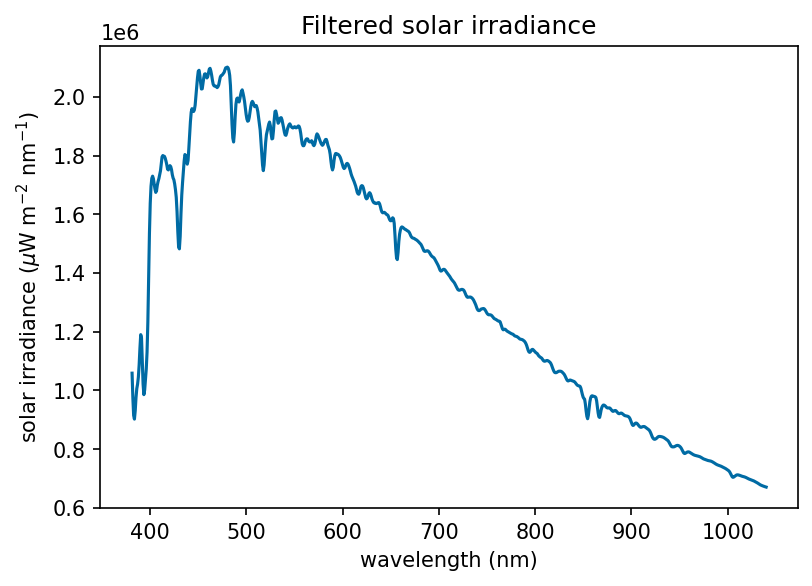

In [12]:
fig, ax = plt.subplots(1)  # create a figure axis
wavelength = ds["Wavelength"]  # define a wavelength variable for convenience
irr = ds.sel(Flight_Number=1)["Irradiance"]  # select the irradiance for a flight
ref = ds.sel(Flight_Number=1)["Lunar_Reflectance"]  # select the irradiance for a flight
ax.plot(
    wavelength, irr / ref, label=f"flight {flight_number}"
)  # plot the irradiance and add a label for the legend.
ax.set_xlabel("wavelength (nm)")

units = ds["Irradiance"].attrs[
    "units"
]  # get the units for the irradiance from the dataset.
ax.set_ylabel(
    f"solar irradiance ({units})"
)  # add a label using python f-string functionality.
ax.set_title("Filtered solar irradiance")
# ax.legend()
fig.set_size_inches(6, 4)  # change the figure size

Note that the spectrum is taken to be the same for all flights. 

# air-LUSI lineshapes

The air-LUSI instrument had the spectral response functions of its pixels characterized in the NIST Stray Light Characterization Facility using a tunable laser. The spectral responses show significant out-of-band sensitivity ("spectral stray light"). The data shared here has been corrected for out-of-band sensitivity ("stray light corrected"). A file is provided in `./instrument/characterization/3320_lsfs_valid_range.nc` that gives the spectral response functions of each channel. The format loosely follows the standard for the GIRO. 
- `masked_srf` provides stray-light-corrected ("in-band") responses for the air-LUSI pixels. For almost all users, this will be the relevant spectral response function.
- `srf` provides the full, uncorrected spectral response function for each pixel
- `wavelength` provides the wavelengths in nm at which the spectral response functions are sampled. 
- `channel` provides the centroid wavelength of the stray-light-corrected pixels
- `wavenumber` provides the same quantity in wavenumbers (cm$^{-1}$).
- `channel_id` provides physical pixel index. Note that uncalibrated pixels are not included in the dataset.
- `sample` can be ignored.



# Exploring the lineshapes
First the lineshapes are imported

In [13]:
ds_lsfs = xr.load_dataset("../instrument_characterization/3320_lsfs_valid_range.nc")

then the dataset can be displayed

In [14]:
ds_lsfs

<xarray.Dataset> Size: 449MB
Dimensions:     (channel: 834, wavelength: 33609)
Coordinates:
  * channel     (channel) float64 7kB 381.5 382.3 383.1 ... 1.039e+03 1.04e+03
  * wavelength  (wavelength) float64 269kB 280.1 280.1 ... 1.12e+03 1.12e+03
Data variables:
    srf         (wavelength, channel) float64 224MB 9.625e-05 ... 5.853e-07
    masked_srf  (wavelength, channel) float64 224MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    wavenumber  (wavelength) float64 269kB 3.57e+04 3.57e+04 ... 8.926e+03
    sample      (channel) float64 7kB 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    channel_id  (channel) <U8 27kB 'pixel101' 'pixel102' ... 'pixel934'
Attributes: (12/15)
    regularization parameter:  0.3
    script source:             cas_lsf_generator_from_nc_file.ipynb
    project:                   air-LUSI
    title:                     CAS 3320 Normalized Spectral Response Data
    summary:                   Normalized spectral response functions (SRF) f...
    institution:               NIST
    ...                        ...
    publisher_name:            NIST
    publisher_email:           n/a
    publisher_url:             www.nist.gov
    date_modified:             2024-09-24T14:35:13.014807
    source:                    ['./data/spectrograph_characterization_data/33...
    instrument:                air-LUSI

# Plotting every n-th pixel
Show both the in-band and unmasked spectral response functions

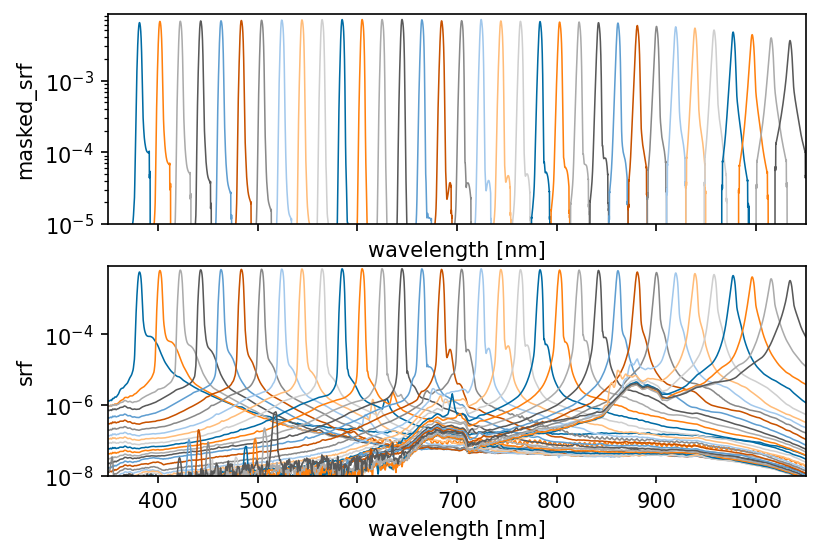

In [15]:
n = 25
fig, ax = plt.subplots(2, sharex=True)
ds_lsfs["masked_srf"][:, ::n].plot.line(
    x="wavelength", add_legend=False, ax=ax[0], linewidth=0.75
)
ax[0].set_yscale("log")
ax[0].set_ylim([1e-5, ds_lsfs["masked_srf"].max() * 1.1])
ds_lsfs["srf"][:, ::n].plot.line(
    x="wavelength", add_legend=False, ax=ax[1], linewidth=0.75
)
ax[1].set_yscale("log")
ax[1].set_ylim([1e-8, ds_lsfs["srf"].max() * 1.1])
ax[1].set_xlim(350, 1050)
fig.set_size_inches(6, 4)

Note that at the extremes of the spectral response functions there are some artifacts from processing (not visible in plot).

## Using the LSFs

Generally, the line spread functions are sampled at a sufficient resolution such that for a spectrum sampled on the same wavelength grid, the dot product between a spectral response function and the spectrum of interest provides the observed signal at that pixel. Here we show a dummy spectrum, a narrow gaussian, and show how to apply the spectral response functions. 

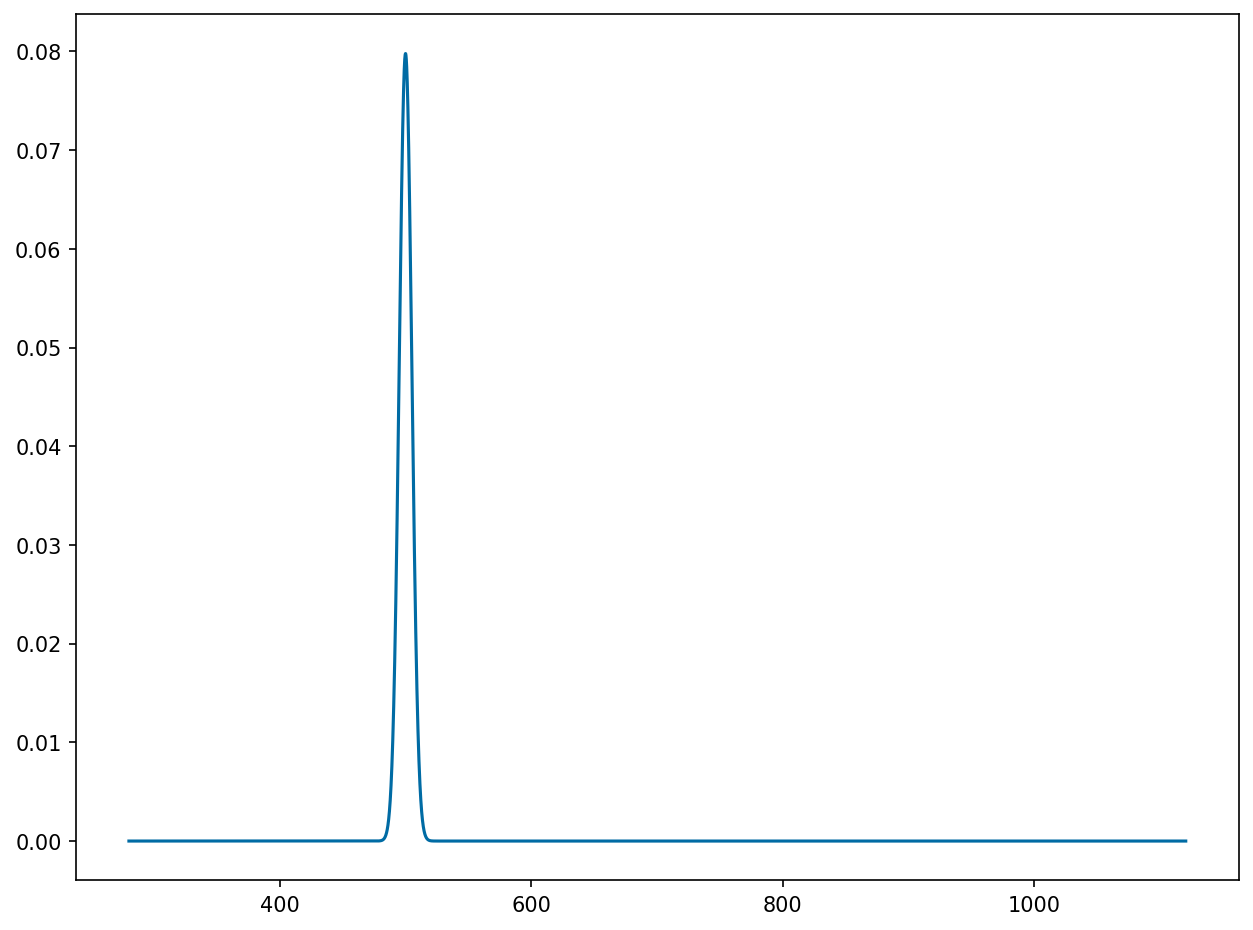

In [16]:
def spectrum_dummy(wl, wl0, sigma):
    return np.exp(-((wl - wl0) ** 2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))


wl = ds_lsfs["wavelength"].values
plt.plot(wl, spectrum_dummy(wl, 500, 5))

Apply `masked_srfs`
First verify how we've normalized the SRFs on this uniform grid. If they need to be resampled, be sure to renormalize. 

In [17]:
all(
    np.round((ds_lsfs["masked_srf"].values).sum(axis=0), 10) == 1
)  # all the masked srfs sum to 1 to at least 10 decimal places.

True

Next apply the `masked_srf` to the dummy spectrum 

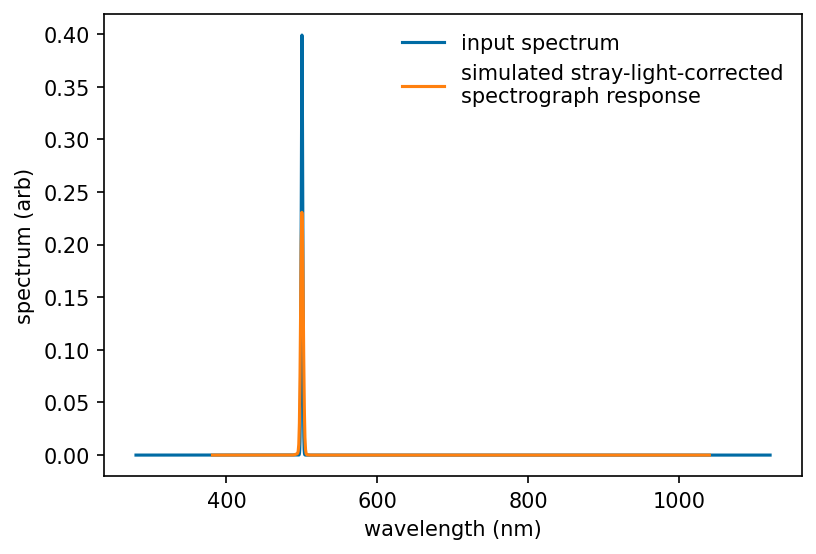

In [18]:
fig, ax = plt.subplots(1)
spec = spectrum_dummy(wl, 500, 1)
spec_filtered = ds_lsfs["masked_srf"].values.T @ spec  # note the transpose
ax.plot(wl, spec, label="input spectrum")
ax.plot(
    ds_lsfs["channel"],
    spec_filtered,
    label="simulated stray-light-corrected\nspectrograph response",
)
ax.legend()
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("spectrum (arb)")
fig.set_size_inches(6, 4)

# Uncertainties
Several component uncertainties are provided. Those wishing to understand sources of error will want to look at the different variables that end in `_err`. Users of the data may solely be interested in the combined relative error, which we display below. The final air-LUSI publication will go into the details of each error source. The spikiness in the plot is due to uncertainty in the wavelength assignment causing derivatives of lines in the solar spectrum. 

The keys for the different uncertainty components are:

In [19]:
[key for key, val in ds.variables.items() if "_err" in key]

['Irradiance_stat_err',
 'slc_rel_err',
 'Wavelength_thermal_uncertainty_rel_err',
 'Calibration_Coefficients_total_rel_err',
 'Wavelength_uncertainty_rel_err',
 'Linearity_rel_err',
 'Camera_alignment_err',
 'Sensitivity_drift_err',
 'Combined_atmospheric_rel_err',
 'Total_rel_err']

## Plot of total uncertainty

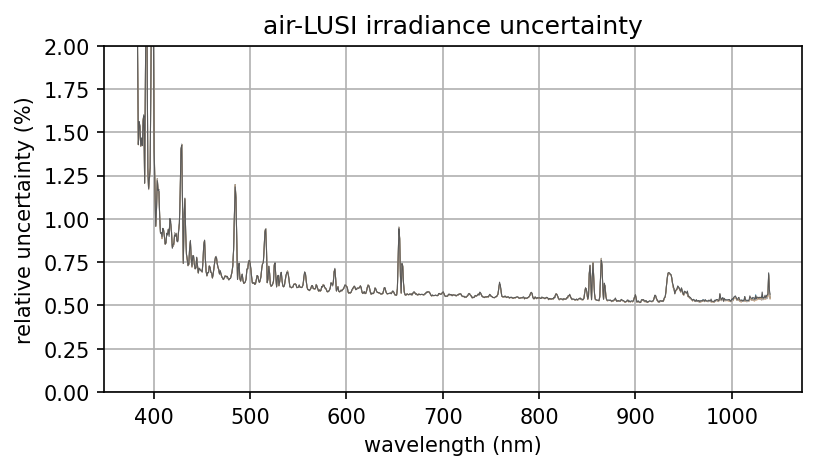

In [20]:
fig, ax = plt.subplots(1)
for flight in ds["Flight_Number"].values:
    ax.plot(
        ds["Wavelength"],
        100 * ds["Total_rel_err"].sel(Flight_Number=flight),
        label=f"flight: {flight}",
        linewidth=0.5,
    )
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("relative uncertainty (%)")
ax.grid()
ax.set_title("air-LUSI irradiance uncertainty")
ax.set_ylim(0, 2)
fig.set_size_inches(6, 3)

## Plot of component uncertainties
Here we show the component uncertainties for a single flight. These are similar for all flights. The dataset `ds` contains descriptions of these components, which are printed below:

In [21]:
for key, val in ds.variables.items():
    if "_err" in key:
        print(
            pformat(f'{key}: {ds[key].attrs["description"]}')[1:-1].replace("'", "")
            + "\n"
        )

Irradiance_stat_err: Contributon to total uncertainty at k=1: statistical 
 uncertainty in lunar observations reported by linear fit to data throughout 
 acquisition.

slc_rel_err: Contribution to total uncertainty at k=1: type B uncertainty 
 due to the stray light correction. Estimated based on estimates of line 
 spread functions of Iris and approximate lunar spectra. Calculated in 
 notebook `SLC_uncertainty.ipynb.` Described in NIST Report to NASA 7/2024.

Wavelength_thermal_uncertainty_rel_err: Contribution to total uncertainty at 
 k=1: type B uncertainty due to the difference in temperature of the 
 CAS_Internal thermocouple during flight and during calibration. About 1.5C 
 with an estimated drift of 0.03 nm/C.

Calibration_Coefficients_total_rel_err: Contribution to total uncertainty at 
 k=1: uncertainty due to calibration

Wavelength_uncertainty_rel_err: Contribution to total uncertainty at k=1: 
 type B uncertainty due to error in assigment of the spectrograph wavelength



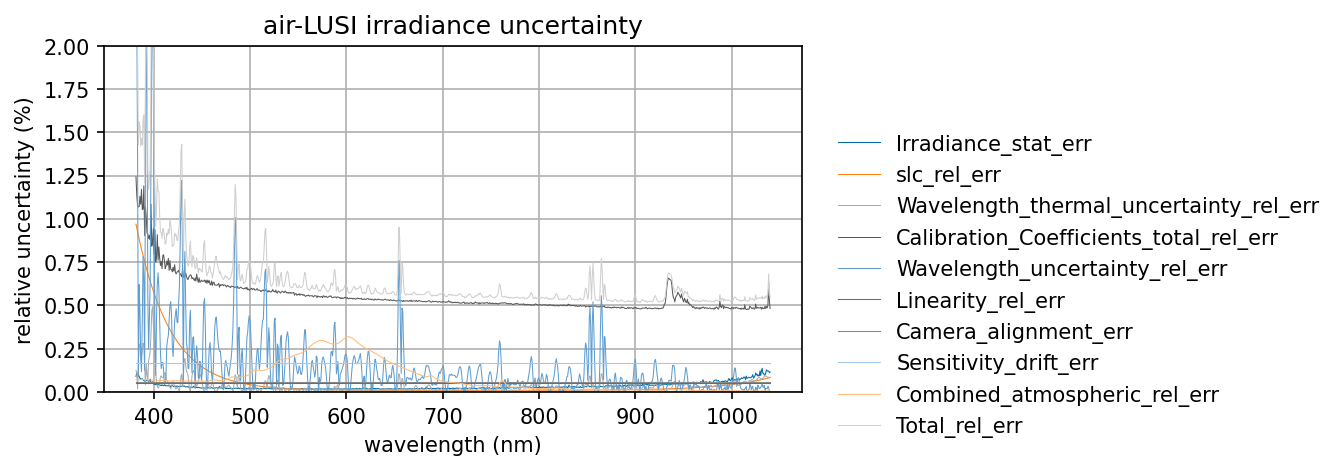

In [22]:
fig, ax = plt.subplots(1)
for flight in [1]:
    for key, val in ds.variables.items():
        if "_err" in key:
            ax.plot(
                ds["Wavelength"],
                100 * ds[key].sel(Flight_Number=flight),
                label=f"{key}",
                linewidth=0.5,
            )
ax.legend(bbox_to_anchor=[1.025, 0.8])
ax.set_xlabel("wavelength (nm)")
ax.set_ylabel("relative uncertainty (%)")
ax.grid()
ax.set_title("air-LUSI irradiance uncertainty")
ax.set_ylim(0, 2)
fig.set_size_inches(6, 3)